# 1- 1TD075 Group 4 Project
Contributors
- Mariia Chuprina
- Halit Ege Ebiller
- Linjing Shen

In [148]:
#Imports
import requests
import json
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#SKLearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [104]:

repositories = []
parameters={ 'q': 'stars:>=50', 'per_page': 100,  'page': 1   }
while len(repositories) < 1000:
  response = requests.get('https://api.github.com/search/repositories', params=parameters)
  if response.status_code == 200:
    batch = response.json()['items']
    repositories.extend(batch)
    print("Batch size: " ,len(batch), " Total number of repositories: ", len(repositories))
    if 'next' in response.links:
      parameters['page'] += 1
    else:
      break
print(repositories[:10])

fieldnames = repositories[0].keys()
print(fieldnames)
with open("original_project_data.csv", 'w', newline='', encoding='utf-8') as csv_file:
  writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
  writer.writeheader()
  for repo in repositories:
    writer.writerow(repo)

Batch size:  100  Total number of repositories:  100
Batch size:  100  Total number of repositories:  200
Batch size:  100  Total number of repositories:  300
Batch size:  100  Total number of repositories:  400
Batch size:  100  Total number of repositories:  500
Batch size:  100  Total number of repositories:  600
Batch size:  100  Total number of repositories:  700
Batch size:  100  Total number of repositories:  800
Batch size:  100  Total number of repositories:  900
Batch size:  100  Total number of repositories:  1000
[{'id': 28457823, 'node_id': 'MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==', 'name': 'freeCodeCamp', 'full_name': 'freeCodeCamp/freeCodeCamp', 'private': False, 'owner': {'login': 'freeCodeCamp', 'id': 9892522, 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjk4OTI1MjI=', 'avatar_url': 'https://avatars.githubusercontent.com/u/9892522?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/freeCodeCamp', 'html_url': 'https://github.com/freeCodeCamp', 'followers_url': 'https://api.github

In [126]:
data = pd.read_csv("original_project_data.csv")

In [106]:
data.drop_duplicates()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,score
0,28457823,MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==,freeCodeCamp,freeCodeCamp/freeCodeCamp,False,"{'login': 'freeCodeCamp', 'id': 9892522, 'node...",https://github.com/freeCodeCamp/freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,False,https://api.github.com/repos/freeCodeCamp/free...,...,True,False,False,"['careers', 'certification', 'community', 'cur...",public,35700,309,390058,main,1.0
1,13491895,MDEwOlJlcG9zaXRvcnkxMzQ5MTg5NQ==,free-programming-books,EbookFoundation/free-programming-books,False,"{'login': 'EbookFoundation', 'id': 14127308, '...",https://github.com/EbookFoundation/free-progra...,:books: Freely available programming books,False,https://api.github.com/repos/EbookFoundation/f...,...,True,False,False,"['books', 'education', 'hacktoberfest', 'list'...",public,60076,43,321704,main,1.0
2,21737465,MDEwOlJlcG9zaXRvcnkyMTczNzQ2NQ==,awesome,sindresorhus/awesome,False,"{'login': 'sindresorhus', 'id': 170270, 'node_...",https://github.com/sindresorhus/awesome,😎 Awesome lists about all kinds of interesting...,False,https://api.github.com/repos/sindresorhus/awesome,...,True,False,False,"['awesome', 'awesome-list', 'lists', 'resource...",public,26861,50,302937,main,1.0
3,54346799,MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==,public-apis,public-apis/public-apis,False,"{'login': 'public-apis', 'id': 51121562, 'node...",https://github.com/public-apis/public-apis,A collective list of free APIs,False,https://api.github.com/repos/public-apis/publi...,...,True,False,False,"['api', 'apis', 'dataset', 'development', 'fre...",public,31937,262,293542,master,1.0
4,60493101,MDEwOlJlcG9zaXRvcnk2MDQ5MzEwMQ==,coding-interview-university,jwasham/coding-interview-university,False,"{'login': 'jwasham', 'id': 3771963, 'node_id':...",https://github.com/jwasham/coding-interview-un...,A complete computer science study plan to beco...,False,https://api.github.com/repos/jwasham/coding-in...,...,True,False,False,"['algorithm', 'algorithms', 'coding-interview'...",public,73983,45,292161,main,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27388642,MDEwOlJlcG9zaXRvcnkyNzM4ODY0Mg==,homebridge,homebridge/homebridge,False,"{'login': 'homebridge', 'id': 38217527, 'node_...",https://github.com/homebridge/homebridge,HomeKit support for the impatient.,False,https://api.github.com/repos/homebridge/homebr...,...,True,False,False,"['hap', 'homebridge', 'homekit', 'homekit-acce...",public,1978,16,23406,latest,1.0
996,683892956,R_kgDOKMNg3A,ChatDev,OpenBMB/ChatDev,False,"{'login': 'OpenBMB', 'id': 89920203, 'node_id'...",https://github.com/OpenBMB/ChatDev,Create Customized Software using Natural Langu...,False,https://api.github.com/repos/OpenBMB/ChatDev,...,True,False,False,[],public,2925,23,23395,main,1.0
997,14812739,MDEwOlJlcG9zaXRvcnkxNDgxMjczOQ==,libuv,libuv/libuv,False,"{'login': 'libuv', 'id': 4030929, 'node_id': '...",https://github.com/libuv/libuv,Cross-platform asynchronous I/O,False,https://api.github.com/repos/libuv/libuv,...,True,False,False,"['asynchronous', 'deep-io', 'io', 'networking'...",public,3517,183,23348,v1.x,1.0
998,192632000,MDEwOlJlcG9zaXRvcnkxOTI2MzIwMDA=,dapr,dapr/dapr,False,"{'login': 'dapr', 'id': 51932459, 'node_id': '...",https://github.com/dapr/dapr,"Dapr is a portable, event-driven, runtime for ...",False,https://api.github.com/repos/dapr/dapr,...,True,False,True,"['containers', 'event-driven', 'kubernetes', '...",public,1830,397,23344,master,1.0


In [107]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   node_id                      1000 non-null   object 
 2   name                         1000 non-null   object 
 3   full_name                    1000 non-null   object 
 4   private                      1000 non-null   bool   
 5   owner                        1000 non-null   object 
 6   html_url                     1000 non-null   object 
 7   description                  997 non-null    object 
 8   fork                         1000 non-null   bool   
 9   url                          1000 non-null   object 
 10  forks_url                    1000 non-null   object 
 11  keys_url                     1000 non-null   object 
 12  collaborators_url            1000 non-null   object 
 13  teams_url          

In [127]:
data = data.drop(columns=[col for col in data.columns if 'url' in col])
data = data.drop(columns=[col for col in data.columns if data[col].dtype == 'object'])
data = data.replace({True: 1, False: 0})

In [109]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   private                      1000 non-null   int64  
 2   fork                         1000 non-null   int64  
 3   size                         1000 non-null   int64  
 4   stargazers_count             1000 non-null   int64  
 5   watchers_count               1000 non-null   int64  
 6   has_issues                   1000 non-null   int64  
 7   has_projects                 1000 non-null   int64  
 8   has_downloads                1000 non-null   int64  
 9   has_wiki                     1000 non-null   int64  
 10  has_pages                    1000 non-null   int64  
 11  has_discussions              1000 non-null   int64  
 12  forks_count                  1000 non-null   int64  
 13  archived           

# 2- Exploratory Data Analysis

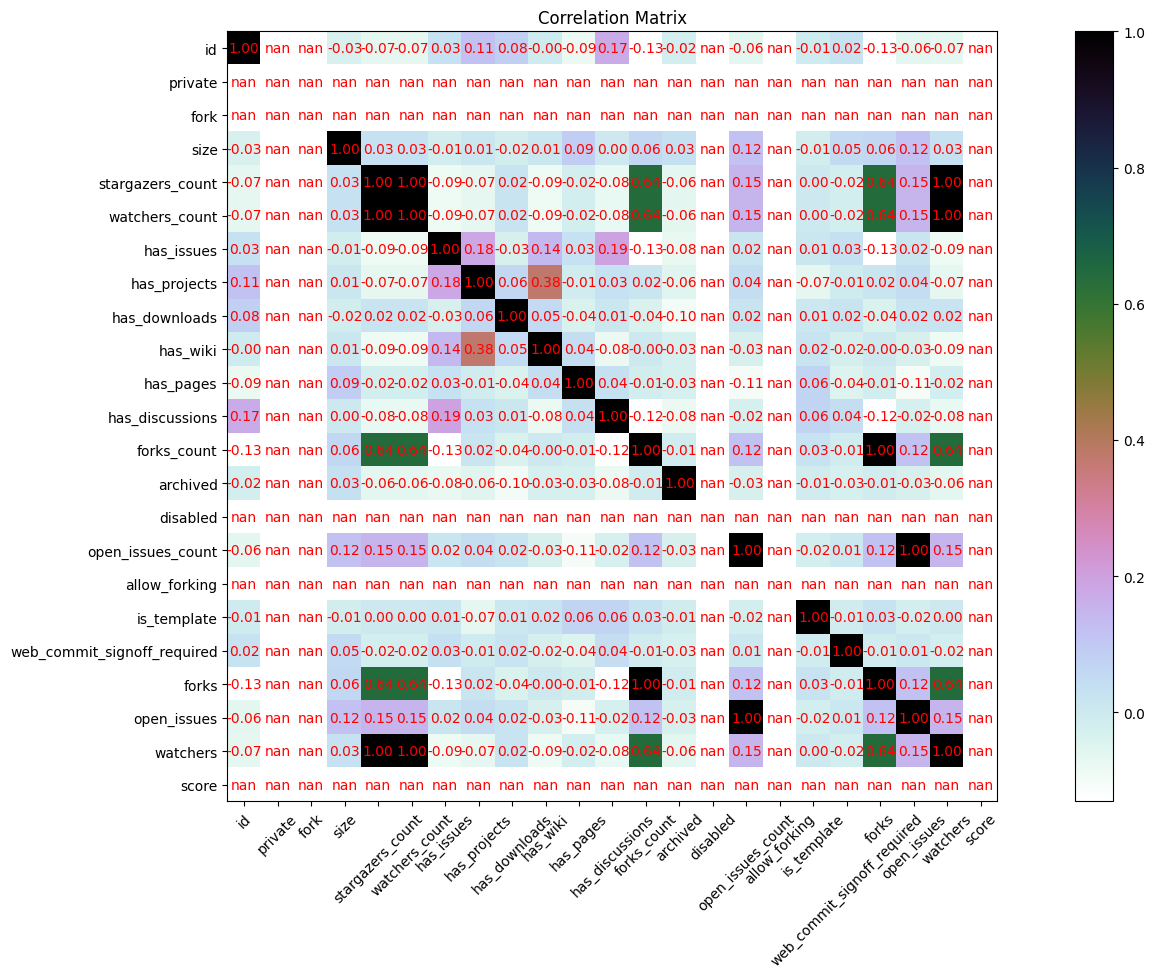

In [110]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 10))
heatmap = plt.imshow(correlation_matrix, cmap = 'cubehelix_r', interpolation = 'nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='r')


plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.colorbar(heatmap)
plt.show()

In [128]:
data = data.drop(columns=['id', 'private', 'fork', 'disabled', 'allow_forking', 'watchers', 'forks', 'score', "watchers_count", "open_issues_count"])

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   size                         1000 non-null   int64
 1   stargazers_count             1000 non-null   int64
 2   has_issues                   1000 non-null   int64
 3   has_projects                 1000 non-null   int64
 4   has_downloads                1000 non-null   int64
 5   has_wiki                     1000 non-null   int64
 6   has_pages                    1000 non-null   int64
 7   has_discussions              1000 non-null   int64
 8   forks_count                  1000 non-null   int64
 9   archived                     1000 non-null   int64
 10  is_template                  1000 non-null   int64
 11  web_commit_signoff_required  1000 non-null   int64
 12  open_issues                  1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


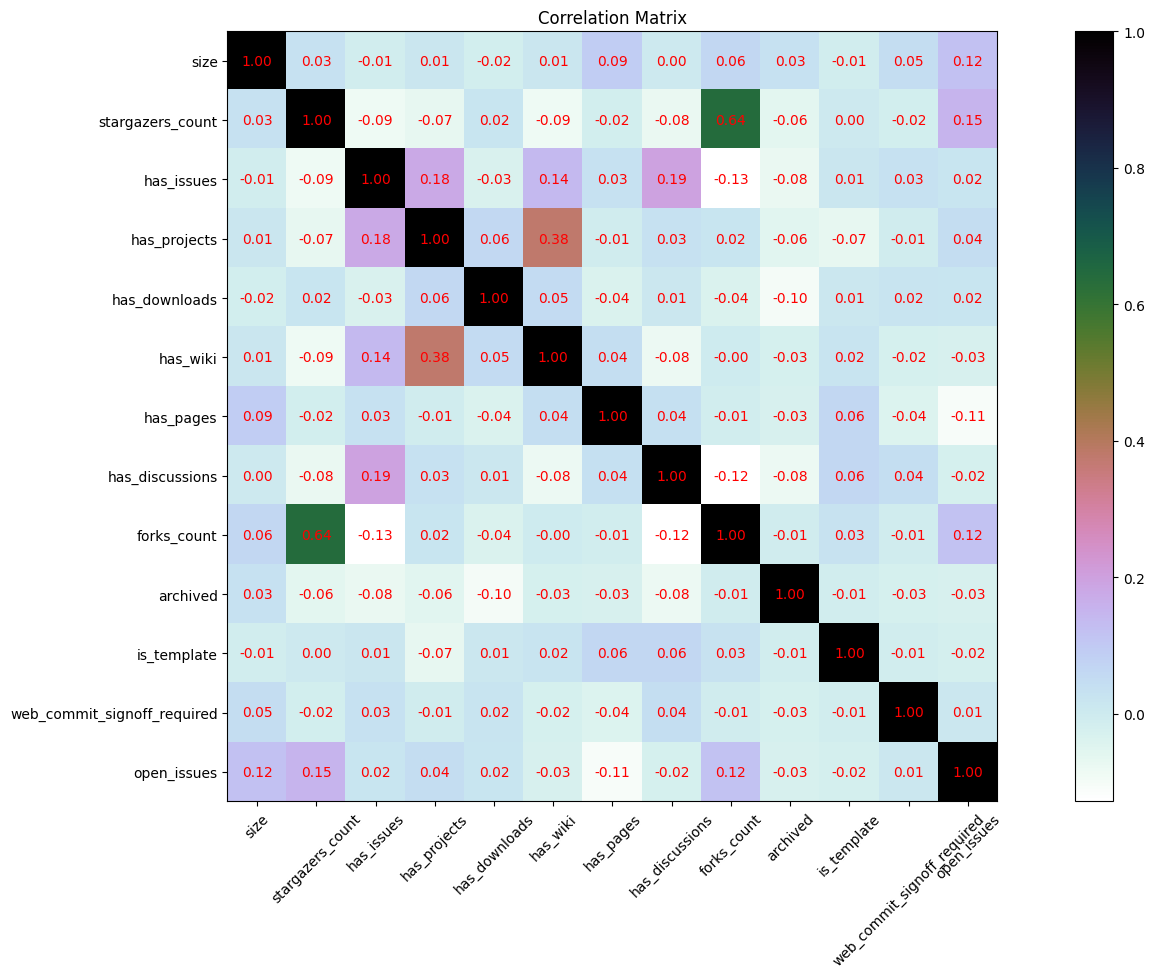

In [130]:
correlation_matrix_2 = data.corr()

plt.figure(figsize=(20, 10))
heatmap = plt.imshow(correlation_matrix_2, cmap = 'cubehelix_r', interpolation = 'nearest')

for i in range(len(correlation_matrix_2)):
    for j in range(len(correlation_matrix_2)):
        plt.text(j, i, f"{correlation_matrix_2.iloc[i, j]:.2f}", ha='center', va='center', color='r')


plt.xticks(range(len(correlation_matrix_2)), correlation_matrix_2.columns, rotation=45)
plt.yticks(range(len(correlation_matrix_2)), correlation_matrix_2.columns)
plt.title("Correlation Matrix")
plt.colorbar(heatmap)
plt.show()

In [131]:
label = 'stargazers_count'
features = data.columns.to_list()
features.remove('stargazers_count')
print("Label:", label)
print("Features:", features)

Label: stargazers_count
Features: ['size', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'has_discussions', 'forks_count', 'archived', 'is_template', 'web_commit_signoff_required', 'open_issues']


In [132]:
X = data[features]
y = data[label]

In [133]:
def train_evaluate(df, features, label, model_list):
    """
    Train and evaluate machine learning models for a given list of algorithms.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the dataset
    - features (list): List of feature names
    - label (String): The label
    - model_list (list): List of machine learning algorithms (pre-instantiated models)

    Returns:
    - results_df (pd.DataFrame): DataFrame containing algorithm names and corresponding mse and r2 scores
    """
    results = []
    
    X = df[features]
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    for algorithm in model_list:
        model = algorithm
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        mse = mean_squared_error(y_test, prediction)
        r2 = r2_score(y_test, prediction)
        results.append({'Algorithm': algorithm.__class__.__name__, 'Mean Squared Error': mse, 'Algorithm': algorithm.__class__.__name__, 'R2': r2})

    results_df = pd.DataFrame(results)
    return results_df

In [136]:
model_list =[RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR(), KNeighborsRegressor()]

In [143]:
for i in model_list:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski',

In [137]:
train_evaluate(data, features, label, model_list)

,Algorithm,Mean Squared Error,R2
0,RandomForestRegressor,6.438705e+08,0.545940
1,DecisionTreeRegressor,1.437152e+09,-0.013486
2,LinearRegression,7.921145e+08,0.441398
3,SVR,1.517198e+09,-0.069934
4,KNeighborsRegressor,8.606008e+08,0.393101


In [169]:
knn_params = {"n_neighbors": range(2, 10)}
dt_params = {'max_depth': range(1, 5),
             "min_samples_split": range(2, 10)}
rf_params = {"max_depth": [5, 20, None],
             "n_estimators": [150, 300]}
lr_params = {"n_jobs" : range(1, 5)}
sv_params = {'C': [0.1, 1, 10, 100],
             'gamma': ['scale', 'auto', 0.1, 1, 10]}

regressors = [(RandomForestRegressor(), rf_params),
              (DecisionTreeRegressor(), dt_params),
              (LinearRegression(), lr_params),
              (SVR(), sv_params),
              ]

In [167]:
def hyperparameter_opti(df, features, label, model_list):
    """
    Train and evaluate machine learning models for a given list of algorithms.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the dataset
    - features (list): List of feature names
    - label (String): The label
    - model_list (list): List of machine learning algorithms (pre-instantiated models)

    Returns:
    - results_df (pd.DataFrame): DataFrame containing algorithm names and corresponding mse and r2 scores
    """
    results = []
    X = df[features]
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    for algorithm, params in model_list:
        # Perform GridSearchCV for hyperparameter tuning
        gs_best = GridSearchCV(algorithm, params, cv=5, n_jobs=-1, verbose=False).fit(X_train, y_train)
        final_model = algorithm.set_params(**gs_best.best_params_)
        # Fit the final model on the entire training set
        final_model.fit(X_train, y_train)
        prediction = final_model.predict(X_test)
        mse = mean_squared_error(y_test, prediction)
        r2 = r2_score(y_test, prediction)
        results.append({'Algorithm': algorithm.__class__.__name__, 'Mean Squared Error': mse, 'Algorithm': algorithm.__class__.__name__, 'R2': r2})
        print({'Algorithm': algorithm.__class__.__name__, 'Mean Squared Error': mse, 'Algorithm': algorithm.__class__.__name__, 'R2': r2})
              
    results_df = pd.DataFrame(results)
    return results_df



In [170]:
hyperparameter_opti(data, features, label, regressors)

{'Algorithm': 'RandomForestRegressor', 'Mean Squared Error': 654500648.2713513, 'R2': 0.5809260988790136}
{'Algorithm': 'DecisionTreeRegressor', 'Mean Squared Error': 828267580.0573847, 'R2': 0.46966389282661225}
{'Algorithm': 'LinearRegression', 'Mean Squared Error': 857020518.3649681, 'R2': 0.4512535122455157}
{'Algorithm': 'SVR', 'Mean Squared Error': 1676744202.4913862, 'R2': -0.07361197574969602}


,Algorithm,Mean Squared Error,R2
0,RandomForestRegressor,6.545006e+08,0.580926
1,DecisionTreeRegressor,8.282676e+08,0.469664
2,LinearRegression,8.570205e+08,0.451254
3,SVR,1.676744e+09,-0.073612
